In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import torch

In [2]:
params = {"pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.sans-serif": [],
    'axes.labelsize': 11,}
plt.rcParams.update(params)
rc('text', usetex=True)

cmap = "viridis"
CM = 1/2.54 

In [3]:
# code from https://d2l.ai/d2l-en.pdf
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),cmap=cmap):
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize,
    sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes)
    plt.savefig('../reports/Graphs/attention-maps.pdf', bbox_inches='tight')

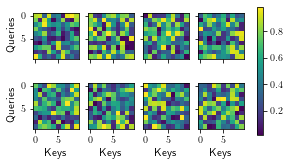

In [4]:
#attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.rand(size=(2, 4, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries', figsize=(12*CM,6*CM))

In [5]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)
  
  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
  pos_encoding = angle_rads[np.newaxis, ...]
    
  return pos_encoding

(1, 64, 96)


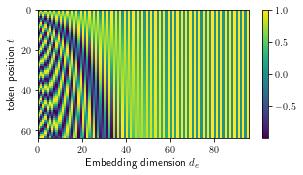

In [6]:
tokens = 64
dimensions = 96



pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)

plt.figure(figsize=(12*CM,6*CM))
plt.pcolormesh(pos_encoding[0], cmap=cmap)
plt.xlabel('Embedding dimension $d_e$')
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel('token position $t$')
plt.colorbar()
plt.savefig('../reports/Graphs/positional-encoding.pdf', bbox_inches='tight')